In [1]:
install.packages('rpart')
install.packages('dplyr')
install.packages('ggplot2')
install.packages('randomForest')
install.packages('Rborist')
install.packages('caret')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘RcppArmadillo’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(rpart)

n <- 1000
sigma <- 0.25
x <- rnorm(n, 0, 1)
y <- 0.75 * x + rnorm(n, 0, sigma)
dat <- data.frame(x = x, y = y)

In [3]:
fit <- rpart(y ~ ., data = dat)

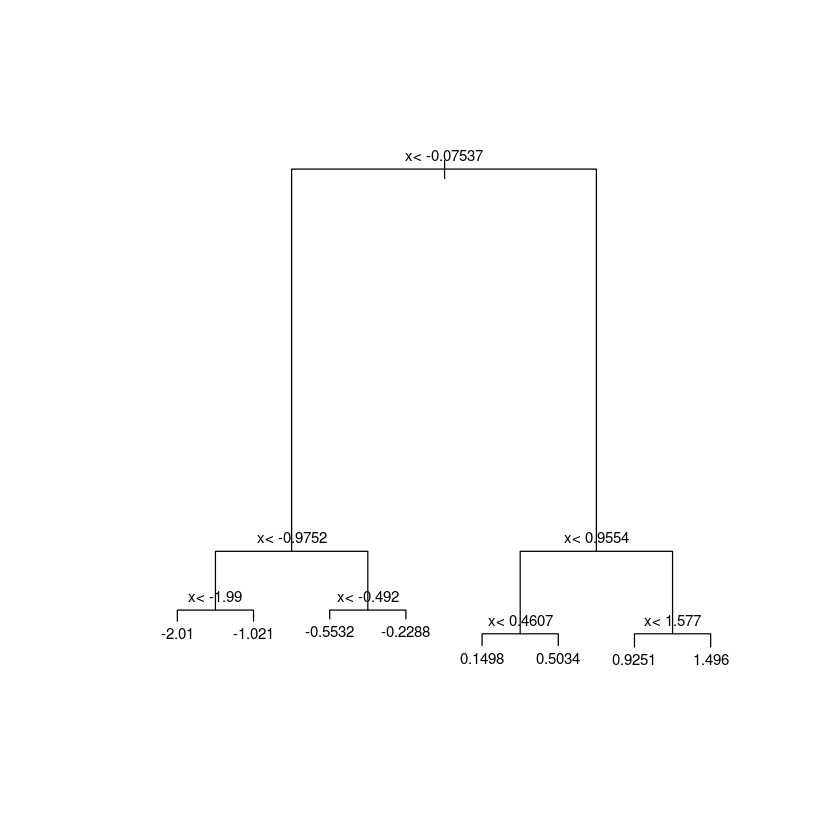

In [3]:
plot(fit,margin = 0.1)
text(fit,cex=0.75)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



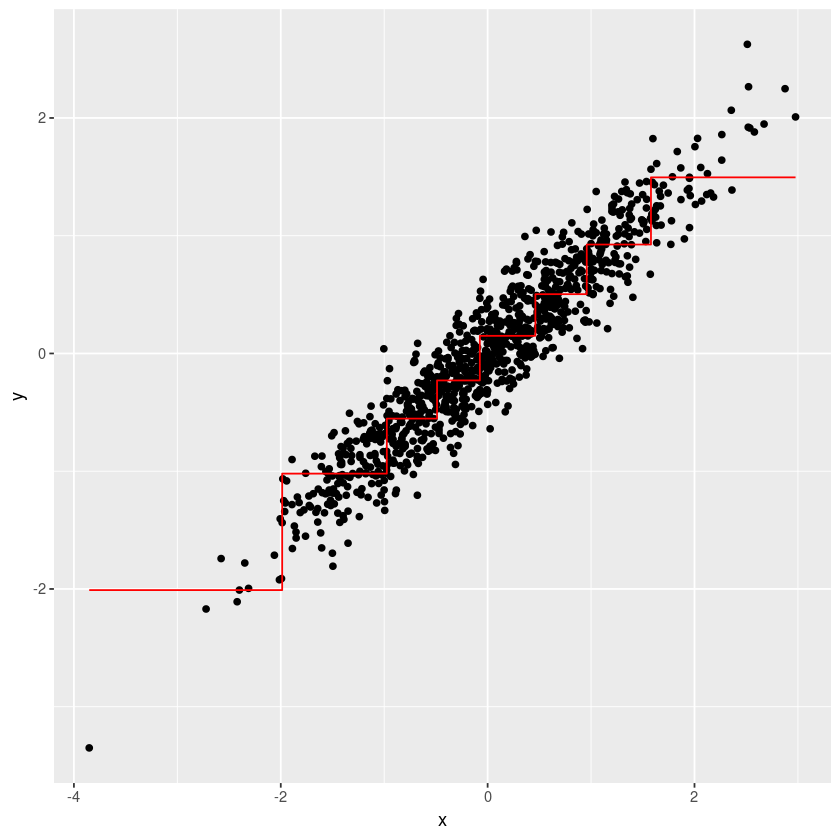

In [4]:
library(dplyr)
library(ggplot2)

dat %>% mutate(y_hat = predict(fit)) %>% ggplot() + geom_point(aes(x, y)) + geom_step(aes(x, y_hat), col=2)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



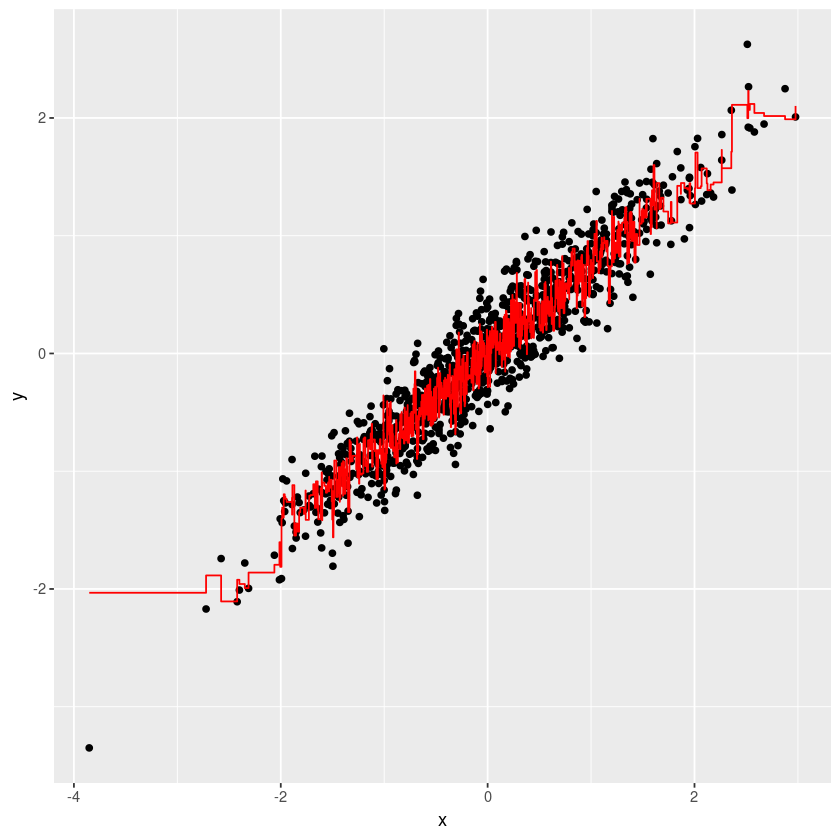

In [5]:
library(randomForest)

fit <- randomForest(y ~ x, data = dat) 

dat %>% 
	mutate(y_hat = predict(fit)) %>% 
	ggplot() +
	geom_point(aes(x, y)) +
	geom_step(aes(x, y_hat), col = 2)

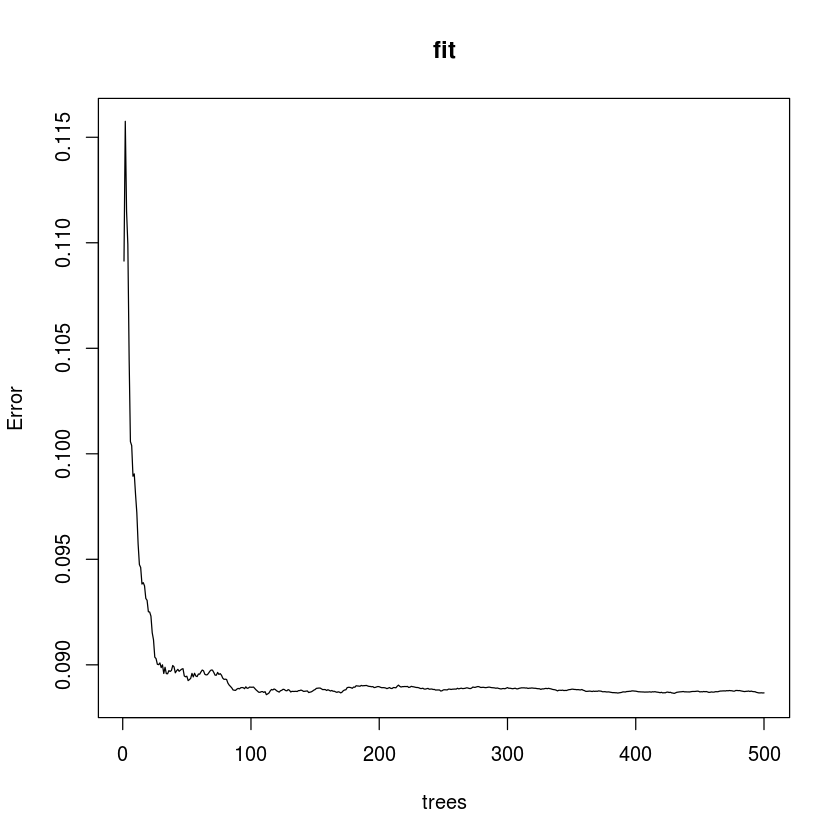

In [6]:
plot(fit)

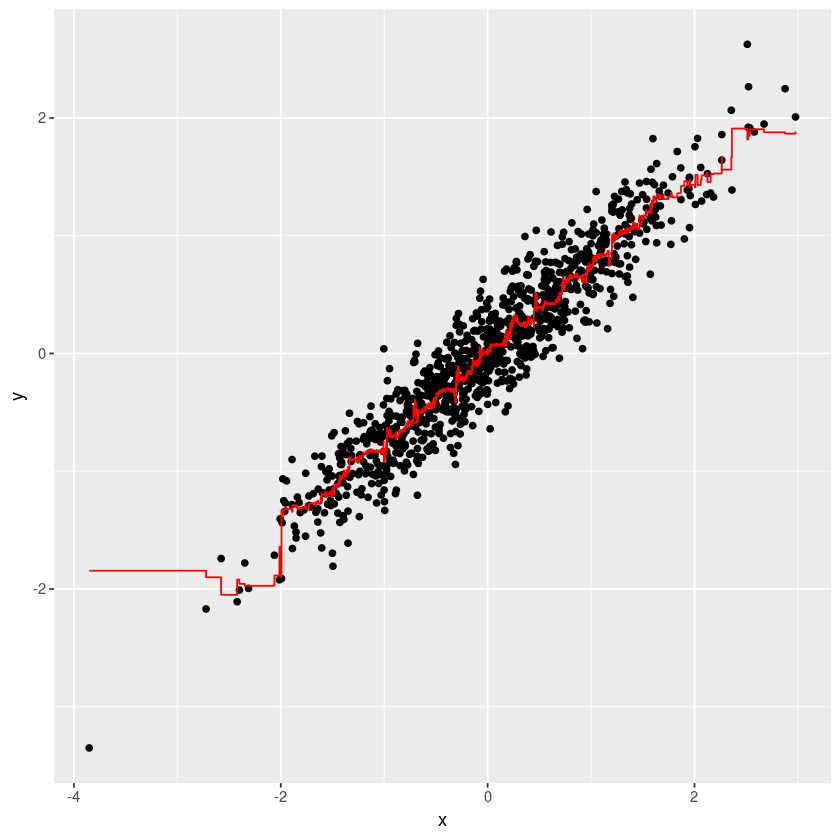

In [7]:
fit <- randomForest(y ~ x, data = dat, nodesize = 50, maxnodes = 25)
dat %>% 
	mutate(y_hat = predict(fit)) %>% 
	ggplot() +
	geom_point(aes(x, y)) +
	geom_step(aes(x, y_hat), col = 2)

In [ ]:
#library(caret)
#library(Rborist)

set.seed(1)
#grid <- expand.grid(data.frame(predFixed=2,minNode=seq(25,100,25)))

#fit <- train(dat$x,dat$y,method='Rborist',data=dat)#tuneGrid= data.frame(predFixed = 2, minNode = c(3, 50)),data=dat)
fit <- train(y ~ .,
      method = "Rborist",
      tuneGrid = data.frame(predFixed = 2, minNode = c(3, 50)),
      data = dat)
#confusionMatrix(predict(fit,mnist_27$test),mnist_27$test$y)$overall['Accuracy']


In [ ]:
fit$finalModel
ggplot(fit)

In [9]:
library(dslabs)

data('tissue_gene_expression')

In [15]:
head(tissue_gene_expression$x)
head(tissue_gene_expression$y)

,MAML1,LHPP,SEPT10,B3GNT4,ZNF280D,SOX12,C21orf62,PER3,HOXA10,HOXC5,⋯,S100A13,EPHA1,MFGE8,OAZ2,PCBP3,POLA1,KREMEN2,CYP7B1,LILRB3,GSAP
cerebellum_1,9.825680,8.327163,5.499382,8.692371,5.642305,6.254751,5.840938,8.330565,5.520803,7.660495,⋯,8.640223,7.017747,8.439859,10.233591,8.457219,7.347544,8.391655,4.760017,8.230182,6.740385
cerebellum_2,9.631247,8.542827,5.644292,8.833679,5.685083,6.289460,6.065646,8.263576,5.528077,7.569041,⋯,9.175377,7.098755,8.627736,9.840514,8.784941,7.476239,8.260828,4.952373,8.332502,6.390683
cerebellum_3,9.690548,8.476486,5.717187,8.498623,5.958232,6.215924,5.771117,9.102294,5.599405,7.418460,⋯,8.875138,6.742484,8.191681,10.060973,8.523428,7.299006,8.275763,4.796232,7.978194,6.677038
cerebellum_4,9.991592,8.506430,5.789430,8.421143,5.736563,6.512055,5.851617,9.210058,5.561197,7.332254,⋯,8.705979,6.850879,8.280976,9.913842,8.210854,7.453407,8.276021,4.963021,7.894200,6.815246
cerebellum_5,9.578130,8.371783,5.779698,8.818455,5.630886,6.201556,5.965732,8.502172,5.601099,7.535668,⋯,8.852406,6.838669,8.043418,10.028252,8.758295,7.253716,8.473418,4.871638,8.129660,6.996641
cerebellum_6,9.860121,8.278559,5.718611,8.728139,5.708949,6.367384,5.769961,8.766777,5.681404,7.535398,⋯,8.576129,6.718682,7.925071,10.103028,8.752971,7.348682,8.624586,4.898603,8.182295,6.665318


[1] cerebellum cerebellum cerebellum cerebellum cerebellum cerebellum
Levels: cerebellum colon endometrium hippocampus kidney liver placenta

In [21]:
library(caret)
library(rpart)

In [35]:
data_ = read.table(tissue_gene_expression,header=TRUE)

ERROR: Error in read.table(tissue_gene_expression, header = TRUE): 'file' must be a character string or connection


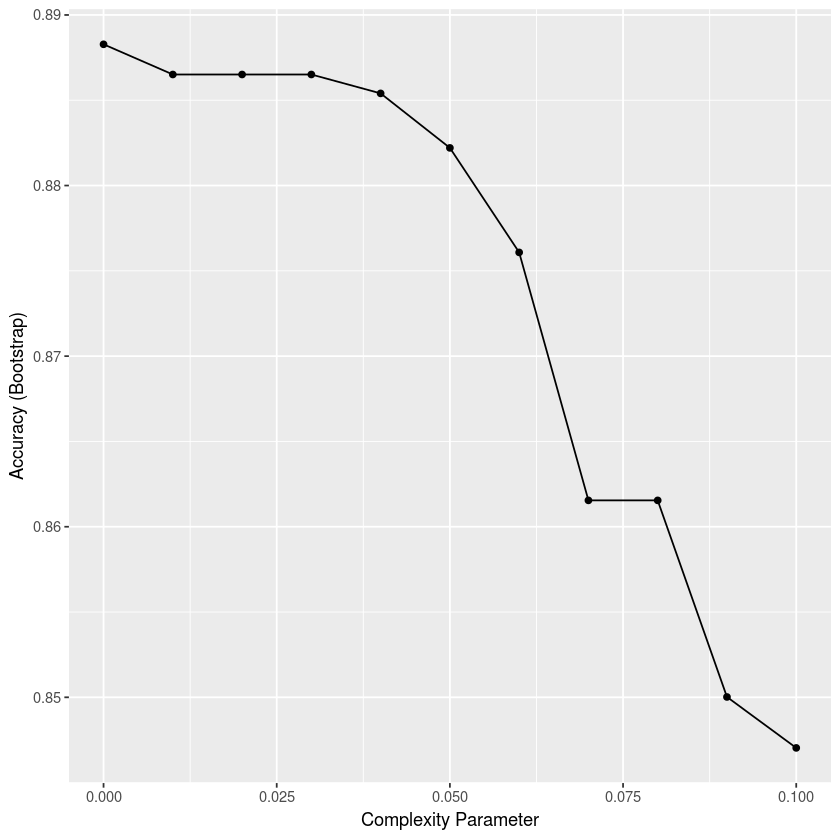

In [56]:
set.seed(1991)

#x_t <- tissue_gene_expression$x
#y_t <- tissue_gene_expression$y

#train_rpart <- train(x=x_t,y=y_t,method='rpart',tuneGrid=data.frame(cp=seq(0.0,0.1,0.01)))
#plot(train_rpart,highlight=TRUE)

fit <- with(tissue_gene_expression, 
                train(x, y, method = "rpart",
                      tuneGrid = data.frame(cp = seq(0, 0.1, 0.01))))
    
ggplot(fit)  

In [57]:
fit$finalModel

n= 189 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 189 150 kidney (0.2 0.18 0.079 0.16 0.21 0.14 0.032)  
   2) GPA33>=8.794181 34   0 colon (0 1 0 0 0 0 0) *
   3) GPA33< 8.794181 155 116 kidney (0.25 0 0.097 0.2 0.25 0.17 0.039)  
     6) CLIP3>=10.45389 69  31 cerebellum (0.55 0 0 0.45 0 0 0)  
      12) CAPN3< 9.490431 38   0 cerebellum (1 0 0 0 0 0 0) *
      13) CAPN3>=9.490431 31   0 hippocampus (0 0 0 1 0 0 0) *
     7) CLIP3< 10.45389 86  47 kidney (0 0 0.17 0 0.45 0.3 0.07)  
      14) CFHR4< 6.679583 60  21 kidney (0 0 0.25 0 0.65 0 0.1)  
        28) CES2< 8.922207 22   7 endometrium (0 0 0.68 0 0.045 0 0.27)  
          56) HRH1>=6.204373 15   0 endometrium (0 0 1 0 0 0 0) *
          57) HRH1< 6.204373 7   1 placenta (0 0 0 0 0.14 0 0.86) *
        29) CES2>=8.922207 38   0 kidney (0 0 0 0 1 0 0) *
      15) CFHR4>=6.679583 26   0 liver (0 0 0 0 0 1 0) *

In [58]:
confusionMatrix(fit)#$overall['Accuracy']

Bootstrapped (25 reps) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
             Reference
Prediction    cerebellum colon endometrium hippocampus kidney liver placenta
  cerebellum        19.3   0.0         0.3         1.1    0.3   0.0      0.2
  colon              0.3  16.5         0.1         0.0    0.1   0.0      0.1
  endometrium        0.1   0.2         5.6         0.1    1.5   0.1      1.3
  hippocampus        0.2   0.0         0.0        15.3    0.1   0.0      0.0
  kidney             0.3   0.3         1.7         0.1   18.7   0.5      0.3
  liver              0.0   0.0         0.3         0.0    0.3  12.6      0.2
  placenta           0.2   0.0         0.4         0.0    0.5   0.1      0.9
                            
 Accuracy (average) : 0.8878


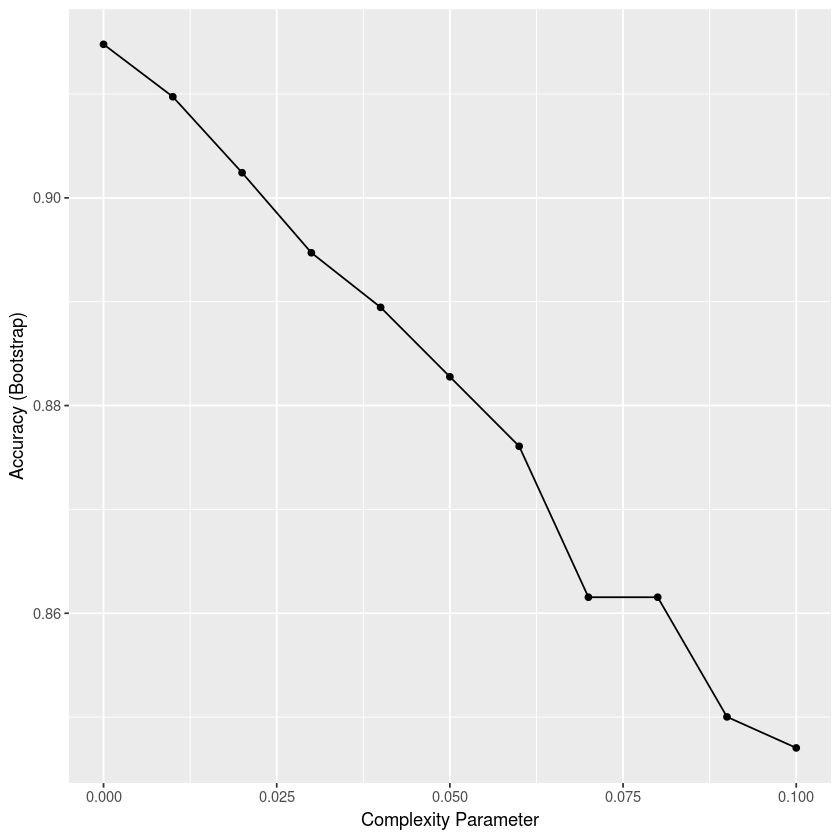

In [59]:
set.seed(1991)

#x_t <- tissue_gene_expression$x
#y_t <- tissue_gene_expression$y

#train_rpart <- train(x=x_t,y=y_t,method='rpart',tuneGrid=data.frame(cp=seq(0.0,0.1,0.01)))
#plot(train_rpart,highlight=TRUE)

fit <- with(tissue_gene_expression, 
                train(x, y, method = "rpart",control = rpart.control(minsplit = 0),
                      tuneGrid = data.frame(cp = seq(0, 0.1, 0.01))))
    
ggplot(fit)  

In [60]:
confusionMatrix(fit)#$overall['Accuracy']

Bootstrapped (25 reps) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
             Reference
Prediction    cerebellum colon endometrium hippocampus kidney liver placenta
  cerebellum        19.5   0.0         0.2         0.9    0.4   0.0      0.1
  colon              0.3  16.5         0.1         0.0    0.1   0.0      0.1
  endometrium        0.1   0.2         6.4         0.1    0.9   0.1      0.5
  hippocampus        0.2   0.0         0.0        15.6    0.1   0.0      0.0
  kidney             0.3   0.3         0.9         0.1   19.1   0.5      0.3
  liver              0.0   0.0         0.3         0.0    0.3  12.6      0.2
  placenta           0.1   0.1         0.5         0.0    0.6   0.1      1.8
                            
 Accuracy (average) : 0.9141


In [61]:
fit$finalModel

n= 189 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 189 150 kidney (0.2 0.18 0.079 0.16 0.21 0.14 0.032)  
    2) GPA33>=8.794181 34   0 colon (0 1 0 0 0 0 0) *
    3) GPA33< 8.794181 155 116 kidney (0.25 0 0.097 0.2 0.25 0.17 0.039)  
      6) CLIP3>=10.45389 69  31 cerebellum (0.55 0 0 0.45 0 0 0)  
       12) CAPN3< 9.490431 38   0 cerebellum (1 0 0 0 0 0 0) *
       13) CAPN3>=9.490431 31   0 hippocampus (0 0 0 1 0 0 0) *
      7) CLIP3< 10.45389 86  47 kidney (0 0 0.17 0 0.45 0.3 0.07)  
       14) CFHR4< 6.679583 60  21 kidney (0 0 0.25 0 0.65 0 0.1)  
         28) CES2< 8.922207 22   7 endometrium (0 0 0.68 0 0.045 0 0.27)  
           56) HRH1>=6.204373 15   0 endometrium (0 0 1 0 0 0 0) *
           57) HRH1< 6.204373 7   1 placenta (0 0 0 0 0.14 0 0.86)  
            114) B3GNT4>=9.131116 1   0 kidney (0 0 0 0 1 0 0) *
            115) B3GNT4< 9.131116 6   0 placenta (0 0 0 0 0 0 1) *
         29) CES2>=8.922207 38   0 kidney (0 0 0 0 1 0 0)

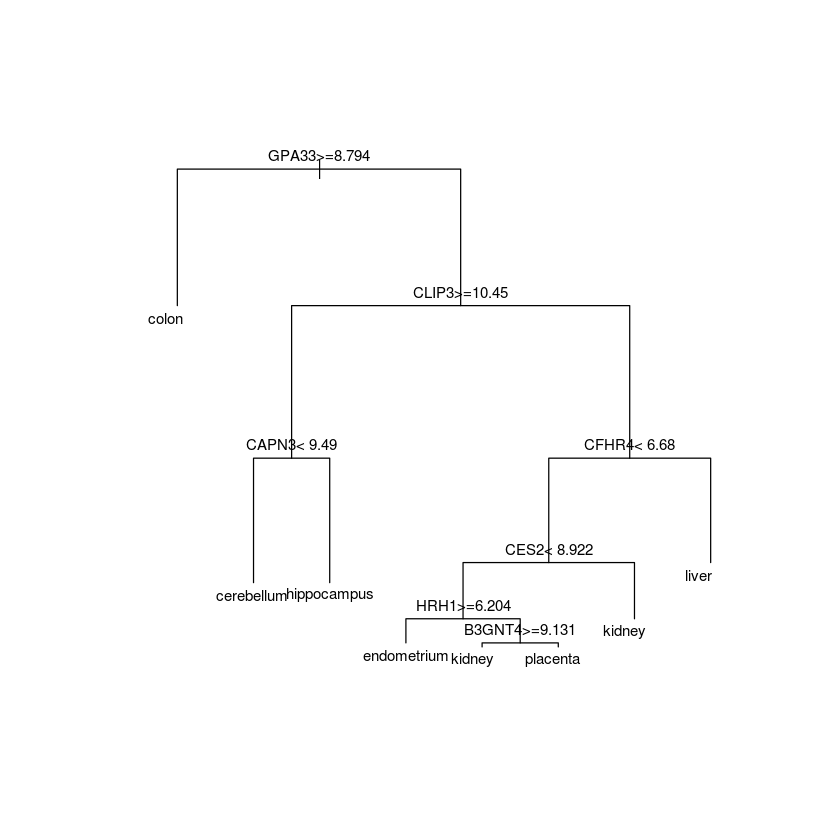

In [64]:
plot(fit$finalModel,margin = 0.1)
text(fit$finalModel,cex=0.75)

In [73]:
set.seed(1991)

#mtry <- sqrt(seq(50,200,25))
#tunegrid <- expand.grid(.mtry=mtry)

fit <- with(tissue_gene_expression, 
                train(x, y, method = "rf",nodesize=1,mtry <- sqrt(seq(50,200,25))))
    
ggplot(fit)  

#confustionMatrix(predict(train_rf,mnist_27$test),mnist_27$test$y)$overall['Accuracy']

Warning message:
“model fit failed for Resample01: mtry=  2 Error in pre_process_options(method, column_types) : 
  These pre-processing methods are unknown: '7.07106781186548', '8.66025403784439', '10', '11.1803398874989', '12.2474487139159', '13.228756555323', '14.142135623731'
”Warning message:
“model fit failed for Resample01: mtry= 31 Error in pre_process_options(method, column_types) : 
  These pre-processing methods are unknown: '7.07106781186548', '8.66025403784439', '10', '11.1803398874989', '12.2474487139159', '13.228756555323', '14.142135623731'
”Warning message:
“model fit failed for Resample01: mtry=500 Error in pre_process_options(method, column_types) : 
  These pre-processing methods are unknown: '7.07106781186548', '8.66025403784439', '10', '11.1803398874989', '12.2474487139159', '13.228756555323', '14.142135623731'
”Warning message:
“model fit failed for Resample02: mtry=  2 Error in pre_process_options(method, column_types) : 
  These pre-processing methods are unkno

Something is wrong; all the Accuracy metric values are missing:
    Accuracy       Kappa    
 Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA  
 NA's   :3     NA's   :3    


ERROR: Error: Stopping


In [67]:
node


Call:
 randomForest(x = x, y = y, mtry = param$mtry, nodesize = 1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 12

        OOB estimate of  error rate: 0%
Confusion matrix:
            cerebellum colon endometrium hippocampus kidney liver placenta
cerebellum          38     0           0           0      0     0        0
colon                0    34           0           0      0     0        0
endometrium          0     0          15           0      0     0        0
hippocampus          0     0           0          31      0     0        0
kidney               0     0           0           0     39     0        0
liver                0     0           0           0      0    26        0
placenta             0     0           0           0      0     0        6
            class.error
cerebellum            0
colon                 0
endometrium           0
hippocampus           0
kidney          

In [68]:
fit$varImp

NULL

In [69]:
confusionMatrix(fit)

Bootstrapped (25 reps) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
             Reference
Prediction    cerebellum colon endometrium hippocampus kidney liver placenta
  cerebellum        20.3   0.0         0.0         0.0    0.1   0.0      0.0
  colon              0.0  17.1         0.1         0.0    0.0   0.0      0.1
  endometrium        0.0   0.0         8.2         0.0    0.0   0.0      0.0
  hippocampus        0.1   0.0         0.0        16.6    0.0   0.0      0.0
  kidney             0.1   0.0         0.0         0.0   21.4   0.0      0.0
  liver              0.0   0.0         0.0         0.0    0.1  13.2      0.0
  placenta           0.0   0.0         0.0         0.0    0.0   0.0      2.9
                            
 Accuracy (average) : 0.9954
